## Starter Code

In [ ]:
import pandas as pd

In [ ]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
print(data_info.loc['revol_util']['Description'])

In [ ]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

In [ ]:
data_info

## Importing Data and Basic Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [4]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
dtype: int64

There is missing data in 6 of the columns in the dataset. I will need to deal with this.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Cleaning the data

Converting the Date columns to date_time>

In [6]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

Machine learning models work best, and in many cases only work, when the values are numerical (ints or floats) and not missing. As can be seen in the `df.info()` call above; many columns have missing values and are not in a numerical format. I have applies 3 strategies for dealing with these columns: a) Dropping the column completely, b) Converting the column into a numerical format, c) Filling in the missing values.

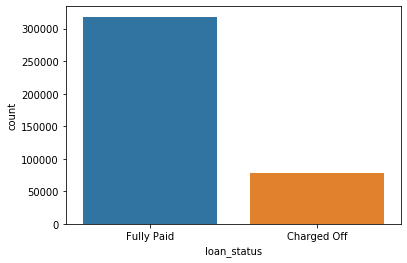

In [7]:
sns.countplot(df['loan_status'])

The `loan_status` column is currently represented as a string. I will change that to a dummy variable.

**Note that the dataset is not very well balanced. This is worth taking into consideration when measuring performance later.**

In [8]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [9]:
df['loan_status'] = df['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})

Converted the `loan_status` column so that zero represents it being "Charged Off" and one represents it being "Fully Paid".

In [10]:
df.groupby('home_ownership')['loan_status'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
home_ownership,,
RENT,159790,0.226622
NONE,31,0.225806
OWN,37746,0.206803
MORTGAGE,198348,0.169561
OTHER,112,0.142857
ANY,3,0.000000


In [11]:
df['is_renter'] = df['home_ownership'].apply(lambda x: 1 if x=='RENT' else 0)

### A) Dropping the column completely 

In [12]:
df = df.drop(columns=['title', 'earliest_cr_line']) 

It is quite possible that the values in these columns are correlated with `loan_status`, however this is the first iteration of the model and so I am trying to keep it simple.

### B) Converting the Columns

In [13]:
df = pd.concat([df, pd.get_dummies(df.address.str.split(' ').str.get(-1), prefix='area_code',drop_first=True)], axis=1)

In [14]:
df = pd.concat([df, pd.get_dummies(df.purpose, prefix='purpose',drop_first=True)], axis=1)

In [15]:
df = pd.concat([df, pd.get_dummies(df.home_ownership, prefix='home_ownership',drop_first=True)], axis=1)

In [16]:
df = df.drop(columns=['home_ownership', 'purpose', 'address'])

In [17]:
df['dti'] = df['dti'].replace({9999.0: df.dti.mean()})

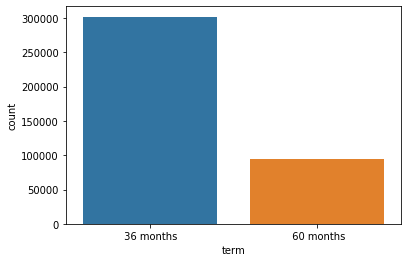

In [18]:
sns.countplot(df['term']);

The `term` column is also represented as a string when really it should be a number. 

In [19]:
df['term'] = df['term'].replace({' 36 months': 36, ' 60 months': 60})

In [20]:
df['initial_list_status_is_w'] = df['initial_list_status'].replace({'w': 1, 'f': 0})

In [21]:
df = df.drop(columns='initial_list_status')

In [22]:
df['emp_length'] = df['emp_length'].replace({'10+ years':14, '2 years':2, '< 1 year':0.5, '3 years':3, '5 years':5, '1 year':1,
       '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9})
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mean())

In [23]:
df.groupby('verification_status')['loan_status'].mean()

verification_status
Not Verified       0.146360
Source Verified    0.214743
Verified           0.223211
Name: loan_status, dtype: float64

The `verification_status` column "indicates if income was verified by LC, not verified, or if the income source was verified." 
Since there is not a big difference in the loan repayment rates of those that where the "Verified" and those that were "Source Verified"; I will group them together.

In [24]:
df['verification_status'] = df['verification_status'].replace({'Not Verified': 0, 'Source Verified': 1, 'Verified': 2})

In [25]:
df['emp_title'].nunique()

173105

In [26]:
df.groupby(df['emp_title'].isna())['loan_status'].mean()

emp_title
False    0.192253
True     0.259214
Name: loan_status, dtype: float64

There are way too many unique values in the `emp_title` to create different columns for them. I thought about dropping the column but I noticed that a missing `emp_title` is associated with not paying back the loan. Below I created a new column `emp_title_present` based on the `emp_title` where one indicates the employee title is present and zero indicates that it is missing. I dropped the original `emp_title`.

In [27]:
df['emp_title_present'] = df['emp_title'].isna().replace({True: 1, False: 0})

In [28]:
df = df.drop(columns='emp_title')

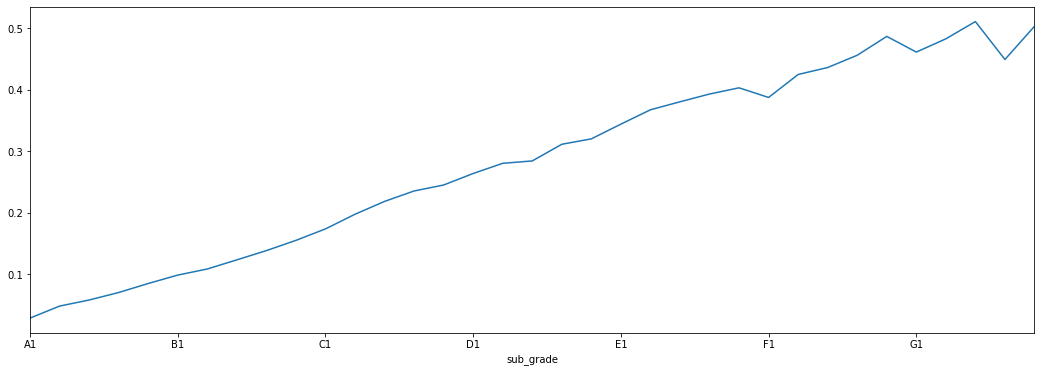

In [29]:
plt.figure(figsize=(18,6))
df.groupby('sub_grade')['loan_status'].mean().plot();

There is almost a perfectly negative linear relationship between `sub_grade` and the probability of it being fully paid. Below I convert the `sub_grade` column into a new column which is a numerical representation of the `sub_grade` with a higher number indicating a better score.

I drop the `grade` and the `sub_grade` column since I now have a numerical representation of these two columns.

In [30]:
subgrade_to_num_dict = dict(zip(sorted(df.sub_grade.unique()), range(df.sub_grade.nunique(),0,-1)))

In [31]:
df['grade_num'] = df['sub_grade'].replace(subgrade_to_num_dict)

In [32]:
df = df.drop(columns=['grade', 'sub_grade'])

In [33]:
df.groupby(df['issue_d'].dt.year)['loan_status'].mean()

issue_d
2007    0.164103
2008    0.158065
2009    0.122582
2010    0.132102
2011    0.152452
2012    0.164798
2013    0.157400
2014    0.231110
2015    0.249013
2016    0.131302
Name: loan_status, dtype: float64

In [34]:
df['issue_year'] = df['issue_d'].dt.year

In [35]:
df = df.drop(columns = 'issue_d')

In [36]:
df.groupby(df['application_type'])['loan_status'].mean()

application_type
DIRECT_PAY    0.356643
INDIVIDUAL    0.196087
JOINT         0.127059
Name: loan_status, dtype: float64

In [37]:
df['application_type'] = df['application_type'].replace({'DIRECT_PAY':1, 'INDIVIDUAL':2, 'JOINT':3})

### C) Dealing with missing values

C:\Users\dcony\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


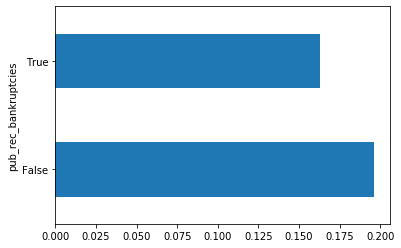

In [38]:
df.groupby(df['pub_rec_bankruptcies'].isna())['loan_status'].mean().plot('barh')

There is not a huge difference between the `pub_rec_bankruptcies` missing values and the `pub_rec_bankruptcies` present values in terms of the probability of paying off the loan. I have decided to fill in the missing values with zero.

In [39]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mean())
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].mean())
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 49 columns):
loan_amnt                     396030 non-null float64
term                          396030 non-null int64
int_rate                      396030 non-null float64
installment                   396030 non-null float64
emp_length                    396030 non-null float64
annual_inc                    396030 non-null float64
verification_status           396030 non-null int64
loan_status                   396030 non-null int64
dti                           396030 non-null float64
open_acc                      396030 non-null float64
pub_rec                       396030 non-null float64
revol_bal                     396030 non-null float64
revol_util                    396030 non-null float64
total_acc                     396030 non-null float64
application_type              396030 non-null int64
mort_acc                      396030 non-null float64
pub_rec_bankruptcies          396

Finally, our data is in a format in which we can use. There are no missing values and the only column that is not in a numerical format is our `loan_status` column which is our target.

In [41]:
df.corr()['loan_status'].sort_values()

grade_num                    -0.262965
area_code_29597              -0.177895
area_code_05113              -0.177743
mort_acc                     -0.070223
home_ownership_MORTGAGE      -0.067024
annual_inc                   -0.053432
purpose_credit_card          -0.037627
total_acc                    -0.017893
purpose_home_improvement     -0.016674
emp_length                   -0.014147
purpose_wedding              -0.012852
purpose_major_purchase       -0.011913
application_type             -0.011296
revol_bal                    -0.010892
area_code_22690              -0.002410
home_ownership_OTHER         -0.002257
purpose_educational          -0.002099
purpose_vacation             -0.001371
area_code_30723              -0.001260
area_code_70466              -0.000515
purpose_house                 0.000198
home_ownership_NONE           0.000661
purpose_renewable_energy      0.002753
area_code_48052               0.004110
purpose_medical               0.005468
purpose_moving           

## Creating the Model

In [42]:
df.drop(columns='loan_status').describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,open_acc,pub_rec,...,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_is_w,emp_title_present,grade_num,issue_year
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,...,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.315296,7.420318e+04,1.036565,17.354309,11.311153,0.178191,...,0.004575,0.500841,0.000078,0.000283,0.095311,0.403480,0.398869,0.057892,23.916519,2013.629074
std,8357.441341,10.212038,4.472157,250.727790,5.083885,6.163762e+04,0.816645,8.550300,5.137649,0.530671,...,0.067487,0.500000,0.008847,0.016815,0.293644,0.490596,0.489666,0.233540,6.600958,1.481725
min,500.000000,36.000000,5.320000,16.080000,0.500000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2007.000000
25%,8000.000000,36.000000,10.490000,250.330000,3.000000,4.500000e+04,0.000000,11.280000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2013.000000
50%,12000.000000,36.000000,13.330000,375.430000,7.000000,6.400000e+04,1.000000,16.910000,10.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2014.000000
75%,20000.000000,36.000000,16.490000,567.300000,14.000000,9.000000e+04,2.000000,22.980000,14.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,2015.000000
max,40000.000000,60.000000,30.990000,1533.810000,14.000000,8.706582e+06,2.000000,1622.000000,90.000000,86.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,2016.000000


In [43]:
X = df.drop(columns='loan_status').values
y = df['loan_status'].values

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

In [46]:
X_train.shape

(316824, 48)

### Scaling the features

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating the Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
model = Sequential()

model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

## Fitting the Model

In [52]:
model.fit(X_train, y_train, epochs=200, workers=-1, callbacks=[early_stop],
          validation_data=(X_test, y_test))

Train on 316824 samples, validate on 79206 samples
Epoch 1/200
316824/316824 [==============================] - 14s 43us/sample - loss: 0.2740 - val_loss: 0.2576
Epoch 2/200
316824/316824 [==============================] - 13s 41us/sample - loss: 0.2618 - val_loss: 0.2592
Epoch 3/200
316824/316824 [==============================] - 15s 49us/sample - loss: 0.2607 - val_loss: 0.2588A: 1s - l - E
Epoch 4/200
316824/316824 [==============================] - 14s 45us/sample - loss: 0.2600 - val_loss: 0.2582
Epoch 5/200
316824/316824 [==============================] - 15s 47us/sample - loss: 0.2597 - val_loss: 0.2562
Epoch 6/200
316824/316824 [==============================] - 14s 45us/sample - loss: 0.2592 - val_loss: 0.2563
Epoch 7/200
316824/316824 [==============================] - 14s 44us/sample - loss: 0.2592 - val_loss: 0.2557
Epoch 8/200
316824/316824 [==============================] - 14s 44us/sample - loss: 0.2590 - val_loss: 0.2566
Epoch 9/200
316824/316824 [=====================

### Predictions of the Model

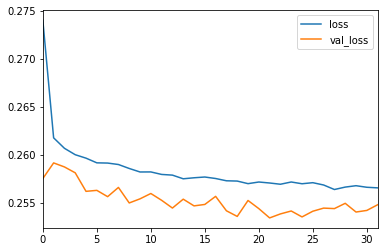

In [53]:
pd.DataFrame(model.history.history).plot()

In [54]:
y_pred = model.predict_classes(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, y_pred))
print("")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     63844
           1       0.99      0.43      0.60     15362

    accuracy                           0.89     79206
   macro avg       0.94      0.71      0.77     79206
weighted avg       0.90      0.89      0.87     79206


[[63809    35]
 [ 8800  6562]]
